# chip quality prediction

## envioroment importion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
path1 = 'D:\Projects_VSCode\Projects_py\ML_NKU\Lab2\machine-learning-ex2\ex2\ex2data1.txt'
path2 = 'D:\Projects_VSCode\Projects_py\ML_NKU\Lab2\machine-learning-ex2\ex2\ex2data2.txt'

### plot data

In [2]:
def PlotData(X,Y):
    pos = np.argwhere(Y==1).reshape(1,-1)[0]
    neg = np.argwhere(Y==0).reshape(1,-1)[0]
    f1 = plt.figure(1)
    plt.scatter(X[0,pos],X[1,pos],c='k',marker='+', label='y=1')
    plt.scatter(X[0,neg],X[1,neg],c='y',marker='o', label='y=0')

    return f1


### gradient

## data loader

In [3]:
Data2 = pd.read_csv(path2, names=['test1', 'test2', 'Accepted'])

## show data

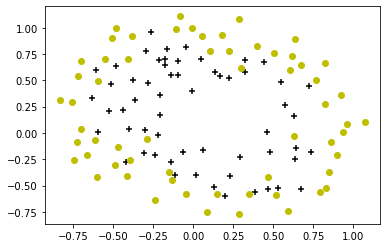

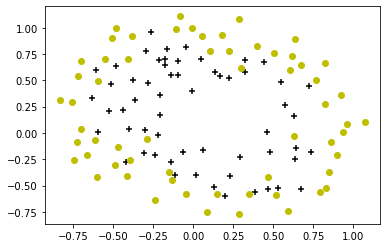

In [4]:
PlotData(Data2.iloc[:, 0:2].values.T,Data2.iloc[:, -1].values.T)
# plt.show()

## hyper parameter

In [5]:
lambd = 0.6
dim = 7 #max dimension when feature mapping
Iters = 400

## logistic regression

### feature mapping

In [6]:
def feature_mapping(x1, x2, power):
    data = {}
    for i in np.arange(power + 1):
        for j in np.arange(i + 1):
            data['F{}{}'.format(i - j, j)] = np.power(x1, i - j) * np.power(x2, j)
    return pd.DataFrame(data)


In [7]:
x1 = Data2['test1']
x2 = Data2['test2']
data2 = feature_mapping(x1, x2, dim)
print(data2)

     F00       F10       F01       F20       F11       F02           F30  \
0    1.0  0.051267  0.699560  0.002628  0.035864  0.489384  1.347453e-04   
1    1.0 -0.092742  0.684940  0.008601 -0.063523  0.469143 -7.976812e-04   
2    1.0 -0.213710  0.692250  0.045672 -0.147941  0.479210 -9.760555e-03   
3    1.0 -0.375000  0.502190  0.140625 -0.188321  0.252195 -5.273438e-02   
4    1.0 -0.513250  0.465640  0.263426 -0.238990  0.216821 -1.352032e-01   
..   ...       ...       ...       ...       ...       ...           ...   
113  1.0 -0.720620  0.538740  0.519293 -0.388227  0.290241 -3.742131e-01   
114  1.0 -0.593890  0.494880  0.352705 -0.293904  0.244906 -2.094682e-01   
115  1.0 -0.484450  0.999270  0.234692 -0.484096  0.998541 -1.136964e-01   
116  1.0 -0.006336  0.999270  0.000040 -0.006332  0.998541 -2.544062e-07   
117  1.0  0.632650 -0.030612  0.400246 -0.019367  0.000937  2.532156e-01   

          F21       F12       F03  ...           F15           F06  \
0    0.001839  0.

### dataset

In [8]:
X = data2.values.T

print(X.shape)
Y = Data2.iloc[:, -1].values.reshape(1,-1)
m = X.shape[1]

print(Y.shape)

(36, 118)
(1, 118)


## Compute cost and gradient

### sigmoid function

In [9]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))


### cost function

In [10]:
def costFunction(theta, X, y):
    hx = Sigmoid(theta.T.dot(X))
    J = -np.sum(y*np.log(hx)+(1-y)*np.log(1-hx))/m
    return J

In [11]:
def gradient(theta, X, y):
    grad = np.zeros(theta.shape)
    hx = Sigmoid(theta.T.dot(X))
    grad = ((hx-y)@X.T).T
    return grad

### cost function with regularization

In [12]:
def costFunction_reg(theta,X,Y,lambd):
    J = costFunction(theta,X,Y)
    J += lambd*np.sum(theta)/(2*m)
    return J

In [13]:
init_theta = np.zeros((X.shape[0],1))
print(init_theta.shape)

(36, 1)


### gradient with regularization

In [14]:
def gradient_reg(theta,X,Y,lambd):
    grad = gradient(theta,X,Y)
    grad+=lambd*theta/m
    return grad

## Optimizing

In [19]:
result = op.minimize(fun=costFunction_reg, x0=init_theta.flatten(),args=(X,Y.flatten(),lambd),method='TNC',jac=gradient_reg,options={'maxiter':Iters})
print(result)
theta = result.x
print(theta)

     fun: 0.21091444854891167
     jac: array([ 1.62818087,  0.77294952,  0.07491093,  0.73601734,  0.05512142,
        0.14899122,  0.28309087, -0.02028036,  0.2138436 , -0.00339292,
        0.29211488,  0.0680559 ,  0.07220509,  0.01691788,  0.0284845 ,
        0.12604326,  0.03450573,  0.06569032, -0.01733275,  0.08473275,
       -0.05788449,  0.14161834,  0.063198  ,  0.02235189,  0.00796187,
        0.02193327,  0.01858306, -0.03683151,  0.06388768,  0.03480734,
        0.02867214,  0.00180977,  0.01887476, -0.01020147,  0.0459521 ,
       -0.077802  ])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 107
     nit: 4
  status: 1
 success: True
       x: array([ 4.04989536,  2.74412934,  5.04964264, -3.54420172, -8.15857876,
       -7.21832556,  1.76450283, -1.34072055,  3.62421843, -0.71029667,
       -5.26328584,  5.3436074 , -5.89649462, -2.96988272, -5.96276431,
       -1.65269249,  0.20288995,  5.85973503, -5.3054704 , -3.5527685 ,
        0.46535377, -6.27651026,  3.62573

## plot boundary

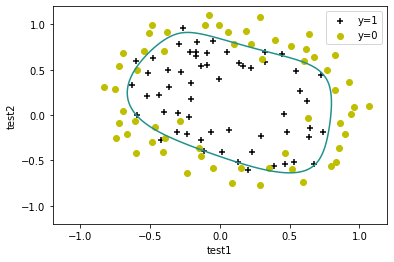

In [16]:
x = np.linspace(-1.2, 1.2, 200)
xx, yy = np.meshgrid(x, x)
z = feature_mapping(xx.ravel(), yy.ravel(), dim).values
zz = z @ theta
zz = zz.reshape(xx.shape)
fig, ax = plt.subplots()
PlotData(Data2.iloc[:, 0:2].values.T,Data2.iloc[:, -1].values.T)
ax.legend()
ax.set_xlabel('test1')
ax.set_ylabel('test2')
plt.contour(xx, yy, zz, 0)
plt.show()


## Predict

In [17]:
def predict(theta,X):
    prob = Sigmoid(theta.T@X)
    return [1 if x >= 0.5 else 0 for x in prob]

In [18]:
y_pre = np.array(predict(theta, X)).reshape(1,-1)
acc = np.mean(y_pre == Y)
print(f'The test accuracy of this model is {acc*100:.2f}%')

The test accuracy of this model is 85.59%
